In [1]:
import numpy as np

class QuotientFilter:
    def __init__(self, size, num_bits):
        self.size = size  # Размер фильтра
        self.num_bits = num_bits  # Количество бит для хранения значений
        self.filter = np.full(size, -1)  # Инициализация фильтра значениями -1
        self.mask = (1 << num_bits) - 1  # Маска для извлечения битов

    def _hash(self, key):
        return hash(key) & self.mask

    def insert(self, key):
        index = self._hash(key) % self.size
        quotient = self._hash(key) >> self.num_bits
        
        while self.filter[index] != -1:
            index = (index + 1) % self.size  # Линейное пробирование

        self.filter[index] = quotient

    def contains(self, key):
        index = self._hash(key) % self.size
        quotient = self._hash(key) >> self.num_bits
        
        while self.filter[index] != -1:
            if self.filter[index] == quotient:
                return True
            index = (index + 1) % self.size
        
        return False

In [ ]:
def evaluate_false_positive_rate(filter, true_set, false_set):
    false_positives = sum(1 for key in false_set if filter.contains(key))
    total_false = len(false_set)
    return false_positives / total_false if total_false > 0 else 0

# Пример использования
true_set = {1, 2, 3, 4, 5}
false_set = {6, 7, 8, 9, 10}

qf = QuotientFilter(size=16, num_bits=4)
for key in true_set:
    qf.insert(key)

false_positive_rate = evaluate_false_positive_rate(qf, true_set, false_set)
print(f"Процент ложноположительных срабатываний: {false_positive_rate:.2%}")

Процент ложноположительных срабатываний: 0.00%


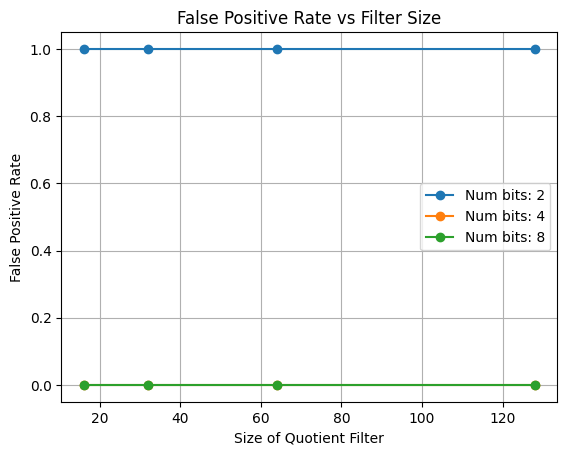

In [3]:
import matplotlib.pyplot as plt

sizes = [16, 32, 64, 128]
num_bits_options = [2, 4, 8]
results = {num_bits: [] for num_bits in num_bits_options}

for num_bits in num_bits_options:
    for size in sizes:
        qf = QuotientFilter(size=size, num_bits=num_bits)
        for key in true_set:
            qf.insert(key)
        false_positive_rate = evaluate_false_positive_rate(qf, true_set, false_set)
        results[num_bits].append(false_positive_rate)

# Построение графиков
for num_bits, rates in results.items():
    plt.plot(sizes, rates, marker='o', label=f'Num bits: {num_bits}')

plt.xlabel('Size of Quotient Filter')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate vs Filter Size')
plt.legend()
plt.grid()
plt.show()